## Phys604 - Homework 2

### 1)

Plot $f(x)=\pi/2+2(sin(x)+sin(3x)/3+sin(5x)/5+...+sin(nx)/n)$

From $\pi$ to $-\pi$ with $n=11,21,31$.

In /home/cjs16/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cjs16/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cjs16/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/cjs16/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cjs16/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

--- 0.04798626899719238 seconds ---


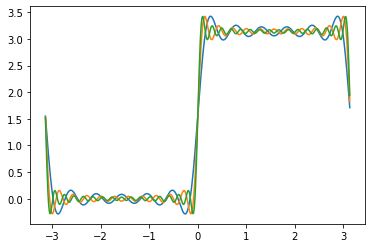

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

x=np.arange(-3.14,3.14,0.01)

def func(x,n):
    func= np.pi/2
    n=(n-1)/2
    n=int(n)
    
    for i in range(0,n+1):
        func += 2*np.sin((2*i+1)*x)/(2*i+1)
    return func

start_time = time.time()

y=func(x,11)
y1=func(x,21)
y2=func(x,31)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)

print("--- %s seconds ---" % (time.time() - start_time))

### 2) Create a simple animation

### Description:

I tried different settings to animate a precessing planet. I accidently realized there are two types of precession. I'm not entirely sure, but I believe the following would be the physical difference. Both would be caused by a planet's oblateness.

$\textbf{Tidally-Locked Precession (Left):}$ I believe the Tidally-Locked precession would occur depending on how irregularly the planet's mass was distributed with respect to longitude. On Earth, plate tectonics create irregularities (obviously, because we have continents). So, if the Earth had a slow enough rotation, and it was close enough to an M-dwarf, this would occur.

$\textbf{"Free" Precession (Right):}$ The Free precession would occur if the planet was uniform in mass distribution along longitude. This is Earth's current state of precession because the Earth is rotating fast enough and it is far enough away from the Sun. If it were ONLY the Earth and Sun, the Earth would slow to become tidally-locked. However, I'm not sure if this is possible with the other planets interfering. It is especially impossible if Earth keeps its Moon as the Moon dominates Earth's tidal forces.

In [ ]:
from vpython import *
import numpy as np
scene2 = canvas(title='Tidally-Locked Precession VS Free Precession',
     width=600, height=300,
     center=vector(0,1,2), forward=vector(0,-0.5,-1), background=color.black) # set the camera
# y is pointing up, z is pointing inwards, for the ring, axis is the direction it is pointing
pol=cylinder(pos = vector(-5,-5*np.cos((23/180)*np.pi),-5*np.sin((23/180)*np.pi)),
             axis= vector(0,10*np.cos((23/180)*np.pi),10*np.sin((23/180)*np.pi)), radius=0.3, color=color.red)
pln=sphere(pos = vector(-5,0,0), up=vector(0,np.cos((23/180)*np.pi),np.sin((23/180)*np.pi)),
           axis= vector(1,0,0), radius=4, texture={'file':textures.earth} )

pol2=cylinder(pos = vector(5,-5*np.cos((23/180)*np.pi),-5*np.sin((23/180)*np.pi)),
             axis= vector(0,10*np.cos((23/180)*np.pi),10*np.sin((23/180)*np.pi)), radius=0.3, color=color.red)
pln2=sphere(pos = vector(5,0,0), up=vector(0,np.cos((23/180)*np.pi),np.sin((23/180)*np.pi)),
           axis= vector(1,0,0), radius=4, texture={'file':textures.earth} )



for i in range(200):
    rate(10)   # slow down the animation
    pol.axis = vector(10*np.cos((i/10)*np.pi)*np.sin((23/180)*np.pi),10*np.cos((23/180)*np.pi),
                      10*np.sin((i/10)*np.pi)*np.sin((23/180)*np.pi))
    pol.pos  = vector(-5*np.cos((i/10)*np.pi)*np.sin((23/180)*np.pi)-5,-5*np.cos((23/180)*np.pi),
                      -5*np.sin((i/10)*np.pi)*np.sin((23/180)*np.pi))
    pln.axis= vector(1,0,0)
    pln.up = pol.axis
    
    pol2.axis = vector(10*np.cos((i/10)*np.pi)*np.sin((23/180)*np.pi),10*np.cos((23/180)*np.pi),
                      10*np.sin((i/10)*np.pi)*np.sin((23/180)*np.pi))
    pol2.pos  = vector(-5*np.cos((i/10)*np.pi)*np.sin((23/180)*np.pi)+5,-5*np.cos((23/180)*np.pi),
                      -5*np.sin((i/10)*np.pi)*np.sin((23/180)*np.pi))
    pln2.up = pol2.axis